<a href="https://colab.research.google.com/github/BenShieh233/Learn_Python/blob/main/P1(c)_Xie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#installing and importing pyomo
!pip install -q pyomo
from pyomo.environ import *

     |████████████████████████████████| 9.7 MB 3.8 MB/s 
     |████████████████████████████████| 49 kB 983 kB/s 


In [5]:
###ipopt
!wget -N -q "https://ampl.com/dl/open/ipopt/ipopt-linux64.zip"
!unzip -o -q ipopt-linux64

In [16]:
from pyomo.core.base.piecewise import Bound
def obj(x,y):
  return x**2 - x*y + y**2 - 3*x - 1.5*y
#initialize a "Concrete Model"
model = ConcreteModel()

#initialize DVs
model.x = Var(domain = Reals, bounds = (-1,2))
model.y = Var(domain = Reals, bounds = (0,3))

#define the objective
model.Objective = Objective(expr = obj(model.x,model.y), sense = minimize)

model.pprint()

2 Var Declarations
    x : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :    -1 :  None :     2 : False :  True :  Reals
    y : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :     3 : False :  True :  Reals

1 Objective Declarations
    Objective : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : minimize : x**2 - x*y + y**2 - 3*x - 1.5*y

3 Declarations: x y Objective


In [17]:
#solve the model
opt = SolverFactory('ipopt', executable='/content/ipopt')
results = opt.solve(model, tee=True)

Ipopt 3.12.13: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

This is Ipopt version 3.12.13, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        3

Total number of variables............................:        2
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        2
                     variables with only upper bounds:        0
Tot

In [18]:
#print relevant values
print("x* = ", model.x()) #alternatively you can use value(model.x)
print("y* = ", model.y())
print("obj* = ", model.Objective())

x* =  2.0
y* =  1.7500000080342495
obj* =  -5.0625


In [27]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
# Plot the 3D-graph of the function
x = np.linspace(-1,2)
y = np.linspace(0,3)

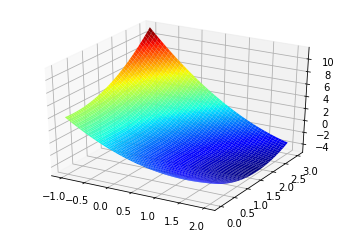

In [31]:
X, Y = np.meshgrid(x,y)
Z = obj(X, Y)

figure = plt.figure()
axis = figure.gca(projection='3d')
axis.plot_surface(X, Y, Z, cmap='jet')